Nama : I Putu Bayu Wira Brata
Username : bayuwira1718
Profile Dicoding : https://www.dicoding.com/users/bayuwira1718

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [ ]:
import zipfile, os, shutil
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [ ]:
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [ ]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) 

In [ ]:
class stopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.97):
      print("\n\nTraining Stopped")
      self.model.stop_training = True

stopCallback = stopCallback()

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks=[stopCallback]
)

Epoch 1/20
25/25 - 39s - loss: 0.0672 - accuracy: 0.9787 - val_loss: 0.0653 - val_accuracy: 0.9750
Epoch 2/20
25/25 - 38s - loss: 0.0931 - accuracy: 0.9700 - val_loss: 0.0831 - val_accuracy: 0.9688
Epoch 3/20


Training Stopped
25/25 - 38s - loss: 0.0365 - accuracy: 0.9875 - val_loss: 0.0332 - val_accuracy: 0.9875


Saving paper.jpg to paper.jpg
paper.jpg
paper


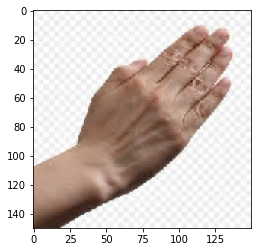

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')